In [1]:
#exercise 1.7

In [2]:
def f(x):
    return x**2

In [3]:
def fprime(x):
    return 2*x

In [4]:
def rootfinder(f, fprime, x0, tol):
    deltax=-f(x0)/fprime(x0)
    while abs(deltax)>=tol:
        x0=x0+deltax
        deltax=-f(x0)/fprime(x0)
    return x0+deltax

In [5]:
rootfinder(f,fprime, 1, .0000001)

5.960464477539063e-08

In [6]:
#works for x^2 - found the only root of x=0 within tolerance
#test x^3-2x^2+5x-1

In [7]:
def g(x):
    return x**3-2*x**2+5*x-1

In [8]:
def gprime(x):
    return 5 - 4* x + 3 *x**2

In [9]:
rootfinder(g,gprime,1,.0000001)

0.21675657195125086

In [10]:
#found only real root ofx≈0.216756571951251 within tolerance (from wolfram)

In [11]:
#test for x^4 + 6 x^3 - 3 x^2 - 56 x - 48 - this has three real roots one of which is a double root

In [12]:
def h(x):
    return x**4 + 6*x**3 - 3*x**2 - 56*x - 48

In [13]:
def hprime(x):
    return -56 - 6 *x + 18 *x**2 + 4 *x**3

In [14]:
#start near root of x=3
rootfinder(h,hprime,4,.0000001)

3.0

In [15]:
#same one from the left
rootfinder(h,hprime,2,.0000001)

3.000000000000005

In [16]:
#halfway between roots of -1 and 3
rootfinder(h,hprime,1,.0000001)

-1.0

In [17]:
#where does it flip over? (probably where sign of the derivative changes around x=1.6375)
x0=1
root=rootfinder(h,hprime,x0,.0000001)
step=0.5
while round(root)==-1:
    print(x0,root)
    x0=x0+step
    root=rootfinder(h,hprime,x0,.0000001)
    step=step/2
print(x0,root)

1 -1.0
1.5 -4.000000068827656


In [18]:
#weird i would have though that it would just become the root that the initial guess was moving towards

In [19]:
import numpy as np

In [20]:
x0s=np.linspace(-5,5,1001)

In [21]:
x0s

array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ])

In [22]:
roots=np.zeros(1001)

In [23]:
for i in np.arange(0,1001,1):
    roots[i]=rootfinder(h,hprime,x0s[i],.0000001)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_12492/500309969.py:2: RuntimeWarning: invalid value encountered in scalar divide
  deltax=-f(x0)/fprime(x0)


In [24]:
import matplotlib.pyplot as plt

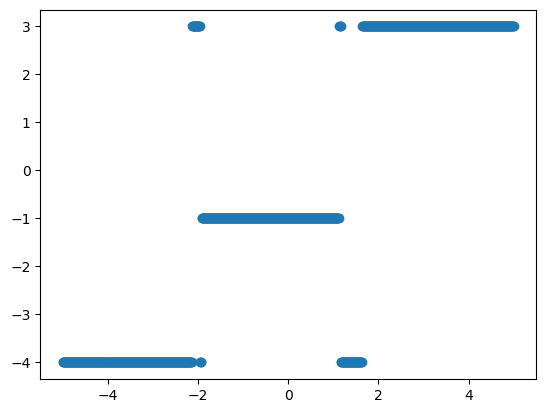

In [25]:
plt.scatter(x0s,roots)

In [26]:
#exercise 1.8 - garbage version
import math
import scipy.integrate as intg

In [27]:
#use units astronomical units, years, and solar masses
a=1.000001 #semi major axis
e=0.0167 #eccentricty
GM=4*(math.pi)**2
x0=0
y0=a*(1-e)
vx0=-((GM/a)*((1+e)/(1-e)))**0.5
vy0=0

In [28]:
t_span=[0,1] #1 year/1 orbital period

In [29]:
xvec=np.array([x0,y0])
xvec

array([0.        , 0.98330098])

In [30]:
vvec=np.array([vx0,vy0])
vvec

array([-6.38900228,  0.        ])

In [31]:
ICs=np.array([xvec,vvec])
ICs

array([[ 0.        ,  0.98330098],
       [-6.38900228,  0.        ]])

In [32]:
ICT=ICs.T #from my understanding of the documentation, should have each diffeq as one column
ICT

array([[ 0.        , -6.38900228],
       [ 0.98330098,  0.        ]])

In [33]:
ICT.flatten().reshape(2,2)

array([[ 0.        , -6.38900228],
       [ 0.98330098,  0.        ]])

In [34]:
def myfunc(xandv):
    xandv=xandv.reshape(2,2)
    xdot=xandv[:,1]
    r=(xandv[0,0]**2+xandv[1,0]**2)**0.5
    vdot=(-GM/r**3)*xandv[:,0]
    return np.array([xdot,vdot]).T

In [35]:
myfunc(ICT.flatten())

array([[ -6.38900228,  -0.        ],
       [  0.        , -40.83069664]])

In [36]:
#intg.solve_ivp(myfunc, t_span, ICT, method='RK45', vectorized=True)

In [37]:
#exercise 1.8 - good version
#start with a simple diffeq and just the Euler solver
#do y'=ky - solution is y=y0*e^kx 

In [38]:
#already hand calculated the steps for these parameters in ODE class
k=1
y0=12
t0=0
deltat=0.25

In [73]:
def mydiffeq(t, y_i):
    return k*y_i #note that it doesn't actually depend on t but need that for correctly coding eulers formula

In [40]:
# def eulers(diffeq, t0, y0, deltat, 2):
#     #should end at the n+1th value if indexed from 1 or the nth value if indexed from 0 to get n steps
#     y_i=y0
#     t_i=t0
#     #just do one step
#     y_i1=y_i+deltat*diffeq(t_i, y_i)
#     return y_i1

In [41]:
# eulers(mydiffeq, t0, y0, deltat,n) got y=15 as expected

In [42]:
def eulers(diffeq, t0, y0, deltat, n):
    #should end at the n+1th value if indexed from 1 or the nth value if indexed from 0 to get n steps
    y_i=y0
    t_i=t0
    i=0
    while i<n:
        y_i=y_i+deltat*diffeq(t_i, y_i)
        t_i+=deltat
        #print(i,y_i,t_i)
        i+=1
    return t_i, y_i

In [43]:
eulers(mydiffeq, t0, y0, deltat,2) #okay yay this works!

(0.5, 18.75)

In [45]:
n=2

In [47]:
np.zeros((2,n+1))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [49]:
t0 + np.arange(0, n+1) * deltat

array([0.  , 0.25, 0.5 ])

In [51]:
#let's also make a version that returns all the points along the way
def eulers_arr(diffeq, t0, y0, deltat, n):
    points=np.zeros((2,n+1))
    points[0,:]=t0 + np.arange(0, n+1) * deltat
    points[1,0]=y0
    i=1
    while i<=n:
        points[1,i]=points[1,i-1]+deltat*diffeq(points[0,i-1], points[1,i-1])
        i+=1
    return points

In [53]:
eulers_arr(mydiffeq, t0, y0, deltat,2) #sweet

array([[ 0.  ,  0.25,  0.5 ],
       [12.  , 15.  , 18.75]])

In [57]:
mypoints=eulers_arr(mydiffeq, t0, y0, deltat,5)

In [61]:
actualys=12*np.exp(mypoints[0])

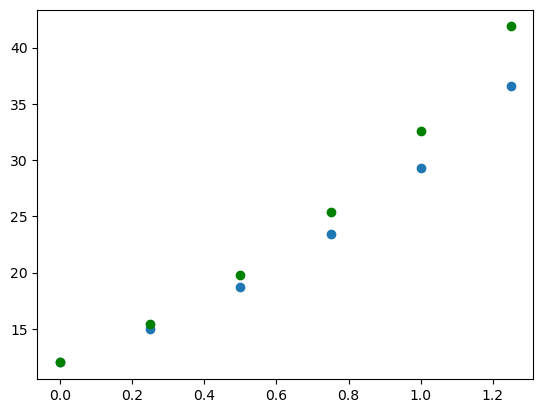

In [65]:
plt.scatter(mypoints[0],mypoints[1])
plt.scatter(mypoints[0],actualys,color='green')

In [69]:
#can see the error growing over time
#okay now time to make a version that can take in many functions
#do simple example of a ball of mass=1kg subject to gravity

In [143]:
t0=0
y0s=np.array([100,5]) #position = 100, velocity=5

In [111]:
np.zeros(y0.shape[0])

array([0., 0.])

In [113]:
def mydiffeq(t, ys):
    yps=np.zeros(ys.shape[0]) #stands for y primes
    yps[0], yps[1]=ys[1], -9.8 #have to do in one row since they can depend on each other
    return yps

In [115]:
mydiffeq(t0,y0s)

array([ 5. , -9.8])

In [127]:
def eulers_arr(diffeq, t0, y0s, deltat, n):
    points=np.zeros((1+y0s.shape[0],n+1))
    points[0,:]=t0 + np.arange(0, n+1) * deltat
    points[1:,0]=y0s
    i=1
    while i<=n:
        points[1:,i]=points[1:,i-1]+deltat*diffeq(points[0,i-1], points[1:,i-1])
        i+=1
    return points

In [135]:
points=eulers_arr(mydiffeq, t0, y0s, 1, 10)

In [145]:
yactual=100+5*points[0]-4.9*(points[0]**2)

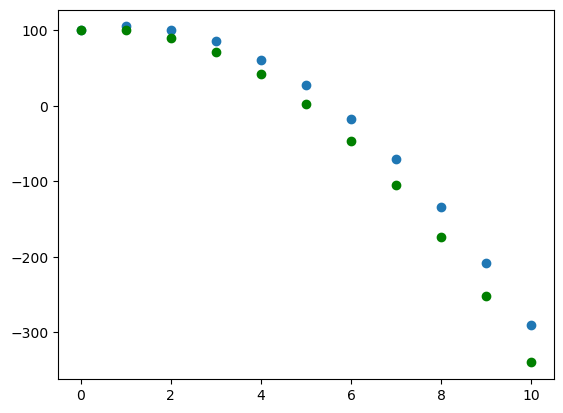

In [149]:
#position vs time
plt.scatter(points[0],points[1])
plt.scatter(points[0],yactual, color='green')

In [151]:
vactual=5-9.8*points[0]

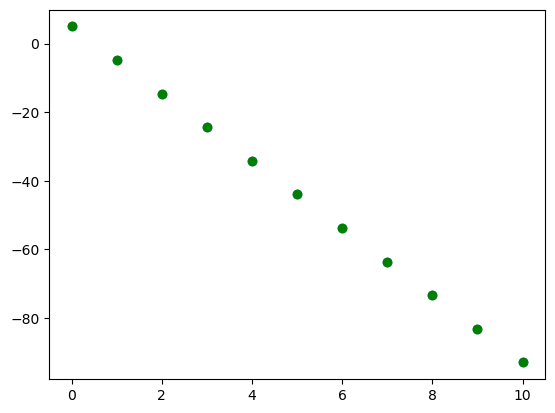

In [153]:
#position vs velocity
plt.scatter(points[0],points[2])
plt.scatter(points[0],vactual,color='green')

In [155]:
#makes sense since in this case the euler approximation is the same as the actual velocity equation

In [248]:
def kinematics(ts, y0s):
    yactual=y0s[0]+y0s[1]*ts+(-9.8/2)*(ts**2)
    vactual=y0s[1]+(-9.8)*ts
    return np.array([yactual,vactual])

In [250]:
actuals=kinematics(points[0],y0s)

In [252]:
print(yactual)
print(vactual)
print(actuals)

[ 100.   100.1   90.4   70.9   41.6    2.5  -46.4 -105.1 -173.6 -251.9
 -340. ]
[  5.   -4.8 -14.6 -24.4 -34.2 -44.  -53.8 -63.6 -73.4 -83.2 -93. ]
[[ 100.   100.1   90.4   70.9   41.6    2.5  -46.4 -105.1 -173.6 -251.9
  -340. ]
 [   5.    -4.8  -14.6  -24.4  -34.2  -44.   -53.8  -63.6  -73.4  -83.2
   -93. ]]


In [219]:
#create error function
def rmse(estimates,actuals):
    errors=estimates-actuals
    errors2=errors**2
    errors2s=np.zeros(errors2.shape[0])
    errors2sm=errors2.mean(axis=1)
    return errors2sm**0.5

In [246]:
rmse(points[1:],actuals)

array([2.89887909e+01, 8.83320525e-15])

In [231]:
deltats=np.zeros(10)
for i in np.arange(0,deltats.shape[0],1):
    if i==0:
        deltats[i]=1
    else:
        deltats[i]=deltats[i-1]/2

In [233]:
print(deltats)

[1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]


In [316]:
def errorvsdeltat(estimator, diffeq, actualfn, t0, y0s, n):
    deltats=np.zeros(10)
    for i in range(deltats.shape[0]):
        if i==0:
            deltats[i]=1
        else:
            deltats[i]=deltats[i-1]/2
    normerrors=np.zeros((y0s.shape[0],10))
    for i in range(deltats.shape[0]):
        estimates=estimator(diffeq, t0, y0s, deltats[i], n)
        actuals=actualfn(estimates[0],y0s)
        errors=rmse(estimates[1:],actuals)
        normerrors[:,i]=errors/deltats[i]
    factor=np.zeros((y0s.shape[0],9))
    for i in range(factor.shape[1]):
        factor[:,i]=normerrors[:,i]/normerrors[:,i+1]
    return factor

In [318]:
errorvsdeltat(eulers_arr,mydiffeq,kinematics,t0,y0s,10)

array([[2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        ],
       [1.        , 8.24621125, 0.70710678, 0.13187609, 0.58503154,
        0.29336935, 0.2440703 , 0.9701425 , 0.2576941 ]])

In [ ]:
#okay now let's code up a RK4 method

In [361]:
def RK4(diffeq, t0, y0s, deltat, n):
    if type(y0s)!=np.ndarray:
        y0s=np.array([y0s])
    points=np.zeros((1+y0s.shape[0],n+1)) 
    points[0,:]=t0 + np.arange(0, n+1) * deltat #this is the array of ts
    points[1:,0]=y0s
    deltat2=deltat/2
    i=1
    while i<=n:
        t=points[0,i-1]
        ys=points[1:,i-1]
        k1=diffeq(t, ys)
        print(k1)
        k2=diffeq(t+deltat2,ys+deltat2*k1)
        k3=diffeq(t+deltat2,ys+deltat2*k2)
        k4=diffeq(t+deltat,ys+deltat*k3)
        points[1:,i]=points[1:,i-1]+(deltat/6)*(k1+2*k2+2*k3+k4)
        i+=1
    return points

In [366]:
def simple(t, y):
    return y

In [369]:
RK4(simple, 0, 12, 0.25, 5)

[12.]
[15.40820312]
[19.78439363]
[25.40349631]
[32.61851927]


array([[ 0.        ,  0.25      ,  0.5       ,  0.75      ,  1.        ,
         1.25      ],
       [12.        , 15.40820312, 19.78439363, 25.40349631, 32.61851927,
        41.88273088]])

In [372]:
def simple_actual(t,y0):
    return y0*np.exp(t)

In [376]:
errorvsdeltat(RK4,rmse, simple, simple_actual, 0, 12, 5, 20)

TypeError: errorvsdeltat() takes 6 positional arguments but 8 were given